#Homework_7 Andrienko O.
Візьміть датасет movielens і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156233 sha256=6130b10e2b315e4c3c7044ac6426c894effd6c2d8fab011365db457c6a6d613c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NMF
from surprise import SVDpp
from surprise import accuracy

import pandas as pd # для роботи з даними
import numpy as np  # для роботи з матрицями
import matplotlib.pyplot as plt # для роботи з графіками

In [4]:
# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')


Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
# Use the famous SVD algorithm.
algo_svd = SVD()

In [6]:
# Run 5-fold cross-validation and print results.
svd_res = cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f'SVD RMSE: {np.mean(svd_res["test_rmse"])}')
print(f'SVD MAE: {np.mean(svd_res["test_mae"])}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9348  0.9378  0.9361  0.9303  0.9404  0.9359  0.0034  
MAE (testset)     0.7364  0.7381  0.7389  0.7352  0.7405  0.7378  0.0019  
Fit time          1.31    1.33    1.31    1.56    1.79    1.46    0.19    
Test time         0.13    0.12    0.12    0.34    0.14    0.17    0.09    
SVD RMSE: 0.9358777927887164
SVD MAE: 0.7378481806762588


In [7]:
# алгоритм SVD++
algo_svdpp = SVDpp()
svdpp_res = cross_validate(algo_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f'SVD++ RMSE: {np.mean(svdpp_res["test_rmse"])}')
print(f'SVD++ MAE: {np.mean(svdpp_res["test_mae"])}')

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9164  0.9198  0.9195  0.9312  0.9143  0.9202  0.0059  
MAE (testset)     0.7159  0.7221  0.7209  0.7301  0.7159  0.7210  0.0052  
Fit time          29.55   27.00   27.58   28.07   30.14   28.47   1.19    
Test time         5.36    5.56    4.43    4.32    5.52    5.04    0.55    
SVD++ RMSE: 0.9202322507970567
SVD++ MAE: 0.7209883872978695


In [8]:
# алгоритм NMF
algo_nmf = NMF()
nmf_res = cross_validate(algo_nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f'NMF RMSE: {np.mean(nmf_res["test_rmse"])}')
print(f'NMF MAE: {np.mean(nmf_res["test_mae"])}')

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9594  0.9684  0.9706  0.9583  0.9586  0.9631  0.0053  
MAE (testset)     0.7536  0.7600  0.7630  0.7551  0.7538  0.7571  0.0037  
Fit time          2.37    2.07    2.71    2.05    2.08    2.26    0.26    
Test time         0.11    0.23    0.18    0.22    0.10    0.17    0.06    
NMF RMSE: 0.9630638399872822
NMF MAE: 0.757128671304683


In [10]:
#Make a dataframe with results
df = pd.DataFrame({'SVD': svd_res['test_rmse'], 'SVD++': svdpp_res['test_rmse'], 'NMF': nmf_res['test_rmse']})
print(f'dataset:\n {df.head()}')

dataset:
         SVD     SVD++       NMF
0  0.934778  0.916411  0.959373
1  0.937824  0.919820  0.968395
2  0.936079  0.919456  0.970641
3  0.930319  0.931214  0.958321
4  0.940389  0.914261  0.958589


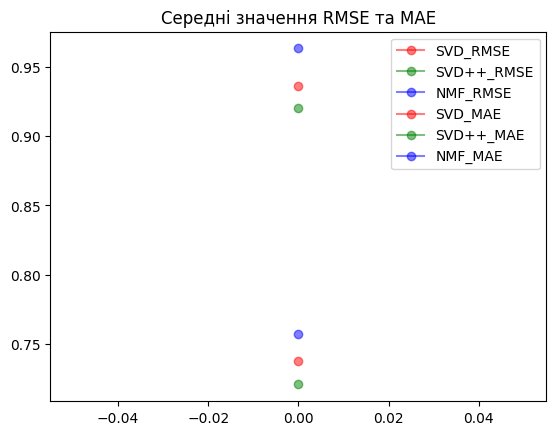

In [11]:
plt.plot(np.mean(svd_res["test_rmse"]), label="SVD_RMSE", color="red", alpha=0.5, marker='o')
plt.plot(np.mean(svdpp_res["test_rmse"]), label="SVD++_RMSE", color="green", alpha=0.5, marker='o')
plt.plot(np.mean(nmf_res["test_rmse"]), label="NMF_RMSE", color="blue", alpha=0.5, marker='o')
plt.plot(np.mean(svd_res["test_mae"]), label="SVD_MAE", color="red", alpha=0.5, marker='o')
plt.plot(np.mean(svdpp_res["test_mae"]), label="SVD++_MAE",  color="green", alpha=0.5, marker='o')
plt.plot(np.mean(nmf_res["test_mae"]), label="NMF_MAE", color="blue", alpha=0.5, marker='o')
plt.legend()
plt.title("Середні значення RMSE та MAE")
plt.show()

In [12]:
#Висновки:
#1. Найкращі результати показав алгоритм SVD++.
#2. Найгірші результати показав алгоритм NMF.
#3. Алгоритм SVD показав результати, які близькі до результатів алгоритму SVD++.